In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string

data = pd.read_csv(r"C:\Users\DELL\Downloads\archive\data\filename.csv")
print(data.head())


                    id      conversation_id               created_at  \
0  1597391697927090181  1597056864759345152  2022-11-29 00:47:13 UTC   
1  1597391687147728896  1597319479792279552  2022-11-29 00:47:10 UTC   
2  1597391678532243456  1597323655981060096  2022-11-29 00:47:08 UTC   
3  1597391672664813568  1597022638807068673  2022-11-29 00:47:07 UTC   
4  1597391670701850624  1597356855176491008  2022-11-29 00:47:07 UTC   

         date      time  timezone              user_id    username  \
0  2022-11-29  00:47:13         0  1469472441621786629  shawneng10   
1  2022-11-29  00:47:10         0              8628942     marcjef   
2  2022-11-29  00:47:08         0  1497149188659834881  tballs4375   
3  2022-11-29  00:47:07         0  1266477358627934213      amtrpa   
4  2022-11-29  00:47:07         0  1518586370528219136    nwrewind   

                name place  ... geo source user_rt_id user_rt retweet_id  \
0     ~natfes-todnes   NaN  ... NaN    NaN        NaN     NaN        N

In [26]:
print(data.columns)

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')


In [27]:
data = data[["username", "tweet", "language", "hashtags"]]

In [28]:
data.isnull().sum()

username    0
tweet       0
language    0
hashtags    0
dtype: int64

In [29]:
data["language"].value_counts()

en     8628
pt      403
it      191
qme     176
ru      117
und      79
ja       71
in       55
es       53
ca       21
ar       20
de       20
fr       20
th       17
fi       14
sr       14
nl       12
qht      12
vi       10
pl        6
et        6
tr        5
zxx       5
el        4
qam       4
bn        4
uk        4
zh        4
ro        4
tl        3
cs        3
fa        3
da        3
ko        2
art       1
hi        1
sv        1
bg        1
ht        1
qst       1
ur        1
cy        1
lv        1
Name: language, dtype: int64

In [30]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["tweet"] = data["tweet"].apply(clean)

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


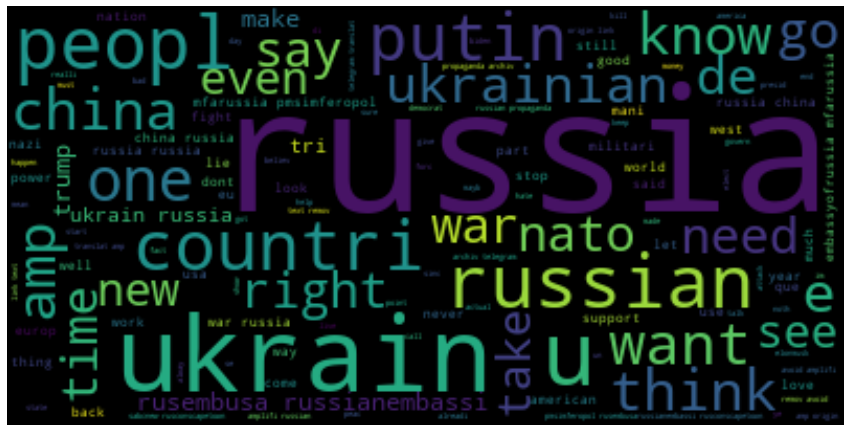

In [32]:
text = " ".join(i for i in data.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [33]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["tweet"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["tweet"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["tweet"]]
data = data[["tweet", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Error loading vader_lexicon: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


                                               tweet  Positive  Negative  \
0  palmerreport use ukrain fight russia us provok...     0.000     0.412   
1              alishbabaigpti cnn open critic russia     0.000     0.344   
2  rjmacnaughton aaronjm cours local element invo...     0.132     0.357   
3  anderssandberg much like iran even russia regi...     0.217     0.000   
4  lockwoodw readi mask russia attack wonder what...     0.000     0.279   

   Neutral  
0    0.588  
1    0.656  
2    0.511  
3    0.783  
4    0.721  


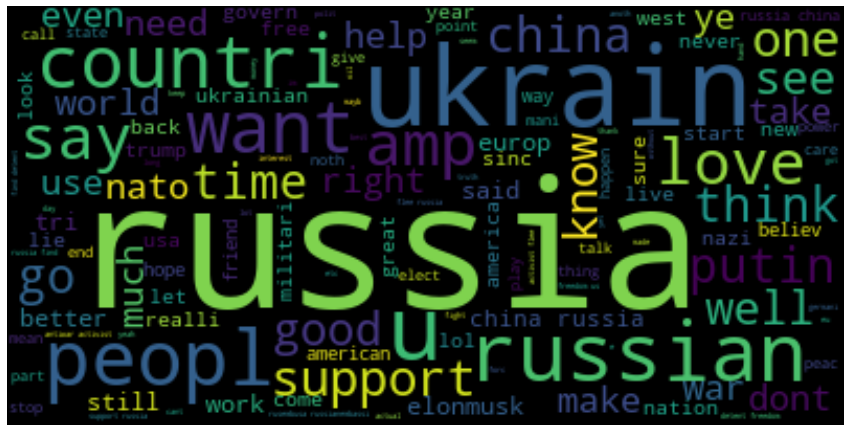

In [34]:
positive =' '.join([i for i in data['tweet'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

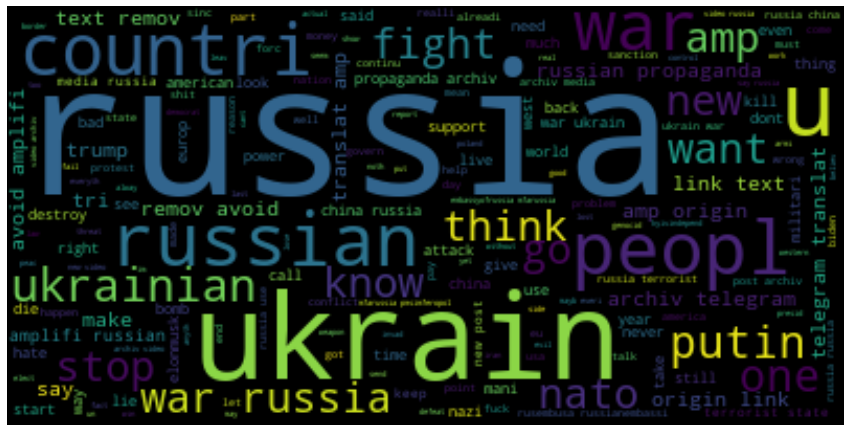

In [35]:
negative =' '.join([i for i in data['tweet'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
ur_labels = ["positive", "negative", "neutral"]
ur_colors = ["Green", "Red", "Blue"]
plt.figure(figsize=(8,5), dpi = 600)
ur_explode = [0, 0.2, 0]
plt.pie([])